## Imports

In [16]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import cmasher as cmr

from astropy.table import Table
import astropy.coordinates as coord
import astropy.units as u

import galstreams
import pandas as pd
pd.set_option('display.max_rows', None)

import pickle

%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.style.use('notebook')

## Data

In [4]:
names = ['20.0-1', '300S', 'ATLAS-Aliqa Uma', 'Acheron',
       'Alpheus', 'Aquarius', 'C-10', 'C-11', 'C-12', 'C-13', 'C-19',
       'C-20', 'C-22', 'C-23', 'C-24', 'C-25', 'C-4', 'C-5', 'C-7', 'C-8',
       'C-9', 'Cetus-Palca', 'Cocytos', 'Corvus',
       'Elqui', 'Eridanus', 'GD-1', 'Gaia-1', 
       'Gaia-11', 'Gaia-12', 'Gaia-2', 'Gaia-3', 'Gaia-4', 'Gaia-5',
       'Gaia-6', 'Gaia-7', 'Gaia-8', 'Gaia-9', 'Gunnthra', 'Hermus',
       'Hrid', 'Hydrus', 'Hyllus', 'Indus', 'Jet', 'Jhelum',
       'Kshir', 'Kwando', 'Wukong', 'Leiptr', 'Lethe', 'M2',
       'M3', 'M30', 'M5', 'M68', 'M92', 'Molonglo',
       'Murrumbidgee', 'NGC 1261',
       'NGC 1851', 'NGC 2298', 'NGC 2808', 'NGC 288', 'NGC 3201',
       'NGC 5053', 'NGC 5466', 'NGC 5824', 'NGC 6101', 'NGC 6362',
       'NGC 6397', 'NGC 7492', 'New-1', 'New-10', 'New-11', 'New-12',
       'New-13', 'New-14', 'New-15', 'New-16', 'New-17', 'New-18',
       'New-19', 'New-2', 'New-20', 'New-21', 'New-22', 'New-23',
       'New-24', 'New-25', 'New-26', 'New-27', 'New-3', 'New-4', 'New-5',
       'New-6', 'New-7', 'New-8', 'New-9', 'Omega Centauri',
       'Ophiuchus', 'Orinoco', 'Orphan-Chenab', 'PS1-A', 'PS1-B', 'PS1-C',
       'PS1-D', 'PS1-E', 'Palomar 13', 'Palomar 15', 'Palomar 5',  'Parallel',
       'Pegasus', 'Perpendicular', 'Phlegethon', 'Phoenix', 'Ravi',
       'SGP-S', 'Sagittarius', 'Sangarius', 'Scamander', 'Slidr',
       'Spectre', 'Styx', 'Sylgr', 'Tucana III',
       'Turbio', 'Turranburra', 'Wambelong', 'Willka Yaku', 'Ylgr']

In [5]:
member_origin = {'20.0-1':[], '300S':['Ibata2024'], 'ATLAS-Aliqa Uma':['Ibata2024','Li2021','Shipp2019'],
                 'Acheron':[], 'Alpheus':[], 'Aquarius':[], 'C-10':['Ibata2024'], 'C-11':['Ibata2024'],
                 'C-12':['Ibata2024'], 'C-13':['Ibata2024'], 'C-19':['Ibata2024'], 'C-20':['Ibata2024'],
                 'C-22':['Ibata2024'], 'C-23':['Ibata2024'], 'C-24':['Ibata2024'], 'C-25':['Ibata2024'], 'C-4':[],
                 'C-5':[], 'C-7':['Ibata2024'], 'C-8':[], 'C-9':['Ibata2024'], 'Cetus-Palca':['Li2021'],
                 'Cocytos':[], 'Corvus':[], 'Elqui':['Shipp2019'], 'Eridanus':[],
                 'GD-1':['Huang2019','Bonaca2020','Ibata2024'], 'Gaia-1':['Ibata2024'], 'Gaia-11':['Ibata2024'],
                 'Gaia-12':['Ibata2024'], 'Gaia-2':[], 'Gaia-3':[], 'Gaia-4':[], 'Gaia-5':[], 'Gaia-6':['Ibata2024'],
                 'Gaia-7':['Ibata2024'], 'Gaia-8':['Ibata2024'], 'Gaia-9':['Ibata2024'], 'Gunnthra':[], 'Hermus':[],
                 'Hrid':['Ibata2024'], 'Hydrus':['Ibata2024'], 'Hyllus':[], 'Indus':['Ibata2024', 'Shipp2019'],
                 'Jet':['Ferguson2022'], 'Jhelum':['Ibata2024','Shipp2019', 'Awad2024'], 'Kshir':['Ibata2024'],
                 'Kwando':['Ibata2024'], 'Wukong':['Ibata2024'], 'Leiptr':['Ibata2024'], 'Lethe':[],
                 'M2':['Grillmair2022', 'Ibata2024'], 'M3':['Ibata2024','Yang2023'], 'M30':['Ibata2024'],
                 'M5':['Grillmair2019','Ibata2024'], 'M68':['Ibata2024'], 'M92':['Ibata2024'], 'Molonglo':[],
                 'Murrumbidgee':[], 'NGC 1261':['Ibata2024'], 'NGC 1851':['Ibata2024'], 'NGC 2298':['Ibata2024'],
                 'NGC 2808':['Ibata2024'], 'NGC 288':['Ibata2024'], 'NGC 3201':['Ibata2024'], 'NGC 5053':[],
                 'NGC 5466':['Ibata2024'], 'NGC 5824':['Yang2022'], 'NGC 6101':['Ibata2024'], 'NGC 6362':[],
                 'NGC 6397':['Ibata2024'], 'NGC 7492':['Ibata2024'], 'New-1':['Ibata2024'], 'New-10':['Ibata2024'],
                 'New-11':['Ibata2024'], 'New-12':['Ibata2024'], 'New-13':['Ibata2024'], 'New-14':['Ibata2024'],
                 'New-15':['Ibata2024'], 'New-16':['Ibata2024'], 'New-17':['Ibata2024'], 'New-18':['Ibata2024'],
                 'New-19':['Ibata2024'], 'New-2':['Ibata2024'], 'New-20':['Ibata2024'], 'New-21':['Ibata2024'],
                 'New-22':['Ibata2024'], 'New-23':['Ibata2024'], 'New-24':['Ibata2024'], 'New-25':['Ibata2024'],
                 'New-26':['Ibata2024'], 'New-27':['Ibata2024'], 'New-3':['Ibata2024'], 'New-4':['Ibata2024'],
                 'New-5':['Ibata2024'], 'New-6':['Ibata2024'], 'New-7':['Ibata2024'], 'New-8':['Ibata2024'],
                 'New-9':['Ibata2024'], 'Omega Centauri':['Ibata2024'], 'Ophiuchus':['Ibata2024'], 'Orinoco':[],
                 'Orphan-Chenab':['Shipp2019','Ibata2024','Koposov2023'], 'PS1-A':[], 'PS1-B':[], 'PS1-C':[],
                 'PS1-D':[], 'PS1-E':[], 'Palomar 13':['Shipp2020'], 'Palomar 15':[], 'Palomar 5':['Ibata2024'],
                 'Parallel':[], 'Pegasus':[], 'Perpendicular':[], 'Phlegethon':['Ibata2024'],
                 'Phoenix':['Ibata2024','Shipp2019'], 'Ravi':[], 'SGP-S':['Ibata2024'], 'Sagittarius':['Vasiliev2021'],
                 'Sangarius':[], 'Scamander':[], 'Slidr':['Ibata2024'], 'Spectre':['Chandra2022'], 'Styx':[],
                 'Sylgr':['Ibata2024'], 'Tucana III':['Ibata2024','Shipp2019'],
                 'Turbio':[], 'Turranburra':['Shipp2019'], 'Wambelong':[], 'Willka Yaku':[], 'Ylgr':['Ibata2024']}

In [6]:
# translate stream names to galstreams
dict_invgalstreams = {'20.0-1':'20.0-1-M18', '300S':'300S-F18', 'ATLAS-Aliqa Uma':'AAU-ATLAS-L21',
                      'Acheron':'Acheron-G09', 'Alpheus':'Alpheus-G13', 'Aquarius':'Aquarius-W11', 'C-10':'C-10-I24',
                      'C-11':'C-11-I24', 'C-12':'C-12-I24', 'C-13':'C-13-I24', 'C-19':'C-19-I21', 'C-20':'C-20-I24',
                      'C-22':'C-22-I24', 'C-23':'C-23-I24', 'C-24':'C-24-I24', 'C-25':'C-25-I24', 'C-4':'C-4-I21',
                      'C-5':'C-5-I21', 'C-7':'C-7-I21', 'C-8':'C-8-I21', 'C-9':'C-9-I24',
                      'Cetus-Palca':'Cetus-Palca-T21', 'Cocytos':'Cocytos-G09', 'Corvus':'Corvus-M18',
                      'Elqui':'Elqui-S19', 'Eridanus':'Eridanus-M17', 'GD-1':'GD-1-PB18', 'Gaia-1':'Gaia-1-I21',
                      'Gaia-11':'Gaia-11-I21', 'Gaia-12':'Gaia-12-I21', 'Gaia-2':'Gaia-2-I21', 'Gaia-3':'Gaia-3-M18',
                      'Gaia-4':'Gaia-4-M18', 'Gaia-5':'Gaia-5-M18', 'Gaia-6':'Gaia-6-I21', 'Gaia-7':'Gaia-7-I21',
                      'Gaia-8':'Gaia-8-I21', 'Gaia-9':'Gaia-9-I21', 'Gunnthra':'Gunnthra-I21', 'Hermus':'Hermus-G14',
                      'Hrid':'Hrid-I21', 'Hydrus':'Hydrus-I24', 'Hyllus':'Hyllus-G14', 'Indus':'Indus-S19',
                      'Jet':'Jet-F22', 'Jhelum':'Jhelum-a-B19', 'Kshir':'Kshir-I21', 'Kwando':'Kwando-I21',
                      'Wukong':'LMS1-Y20', 'Leiptr':'Leiptr-I21', 'Lethe':'Lethe-G09', 'M2':'M2-I21', 'M3':'M3-Y23',
                      'M30':'M30-S20', 'M5':'M5-G19', 'M68':'M68-P19', 'M92':'M92-I21', 'Molonglo':'Molonglo-G17',
                      'Murrumbidgee':'Murrumbidgee-G17', 'NGC 1261':'NGC1261-I21', 'NGC 1851':'NGC1851-I21',
                      'NGC 2298':'NGC2298-I21', 'NGC 2808':'NGC2808-I24', 'NGC 288':'NGC288-I21',
                      'NGC 3201':'NGC3201-P21', 'NGC 5053':'NGC5053-L06', 'NGC 5466':'NGC5466-J21',
                      'NGC 5824':'Tri-Pis-B12',
                      'NGC 6101':'NGC6101-I24', 'NGC 6362':'NGC6362-S20', 'NGC 6397':'NGC6397-I21',
                      'NGC 7492':'NGC7492-I24', 'New-1':'New-1-I24', 'New-10':'New-10-I24', 'New-11':'New-11-I24',
                      'New-12':'New-12-I24', 'New-13':'New-13-I24', 'New-14':'New-14-I24', 'New-15':'New-15-I24',
                      'New-16':'New-16-I24', 'New-17':'New-17-I24', 'New-18':'New-18-I24', 'New-19':'New-19-I24',
                      'New-2':'New-2-I24', 'New-20':'New-20-I24', 'New-21':'New-21-I24', 'New-22':'New-22-I24',
                      'New-23':'New-23-I24', 'New-24':'New-24-I24', 'New-25':'New-25-I24', 'New-26':'New-26-I24',
                      'New-27':'New-27-I24', 'New-3':'New-3-I24', 'New-4':'New-4-I24', 'New-5':'New-5-I24',
                      'New-6':'New-6-I24', 'New-7':'New-7-I24', 'New-8':'New-8-I24', 'New-9':'New-9-I24',
                      'Omega Centauri':'OmegaCen-I21', 'Ophiuchus':'Ophiuchus-C20', 'Orinoco':'Orinoco-G17',
                      'Orphan-Chenab':'Orphan-K23', 'PS1-A':'PS1-A-B16', 'PS1-B':'PS1-B-B16', 'PS1-C':'PS1-C-B16',
                      'PS1-D':'PS1-D-B16', 'PS1-E':'PS1-E-B16', 'Palomar 13':'Pal13-S20', 'Palomar 15':'Pal15-M17',
                      'Palomar 5':'Pal5-PW19', 'Parallel':'Parallel-W18', 'Pegasus':'Pegasus-P19',
                      'Perpendicular':'Perpendicular-W18', 'Phlegethon':'Phlegethon-I21', 'Phoenix':'Phoenix-S19',
                      'Ravi':'Ravi-S18', 'SGP-S':'SGP-S-Y22', 'Sagittarius':'Sagittarius-A20',
                      'Sangarius':'Sangarius-G17', 'Scamander':'Scamander-G17', 'Slidr':'Slidr-I21',
                      'Spectre':'Spectre-C22', 'Styx':'Styx-G09', 'Sylgr':'Sylgr-I21',
                      'Tucana III':'TucanaIII-S19', 'Turbio':'Turbio-S18', 'Turranburra':'Turranburra-S19',
                      'Wambelong':'Wambelong-S18', 'Willka Yaku':'Willka_Yaku-S18', 'Ylgr':'Ylgr-I21'}

In [7]:
# list of streams with published members
published = []
ncatalog = np.zeros(len(names), dtype=int)
for i, stream in enumerate(names[:]):
    catalogs = member_origin[stream]
    ncatalog[i] = len(catalogs)

    if len(catalogs)>0:
        published += [stream]

In [8]:
tall = Table.read('../data/members/all_streams.fits')

In [9]:
tall

<Table length=80686>
     source_id        dist  dist_err ...          Y                  Z         
                      kpc     kpc    ...         kpc                kpc        
       int64        float64 float64  ...       float64            float64      
------------------- ------- -------- ... ------------------- ------------------
 614929674862467712      --       -- ...  -7.739393979971578 12.513463357714752
 615585464829093376      --       -- ... -7.1296444539559305  12.62614225435744
 615793203807403136      --       -- ...  -7.165330457334928 12.692559950472583
 616138592192425856      --       -- ...   -7.80458414557209 12.950489276248849
 616408792882903296      --       -- ...  -7.759902395201679 13.062272146604569
                ...     ...      ... ...                 ...                ...
6149653127828774272      --       -- ...  -9.022126734664399  4.238016450168408
6149830016056996480      --       -- ...  -9.189595110902289  4.189877830673839
6149903339738770560      --       -- ...  -9.120246559225535  4.241384086054953
6150816067532736896      --       -- ...  -9.102276789093304  4.217126851119484
6151097027112747392      --       -- ...   -8.99779300444159  4.274770160131918

### Orbital properties

In [10]:
to = Table.read('../data/streams_full_summary.fits')

In [11]:
to

<Table length=131>
      name            length       ...        Lmax               circLz       
                       deg         ...     kpc2 / Myr                         
    bytes15          float64       ...      float64             float64       
--------------- ------------------ ... ------------------ --------------------
         20.0-1  36.61975641513118 ...                 --                   --
           300S 24.664792391778157 ...   5.77977891209135 0.030310817427487004
ATLAS-Aliqa Uma  40.67613254714904 ...  5.523683188511237  0.32883807789416275
        Acheron  36.53209164130622 ...                 --                   --
        Alpheus  24.21605780877683 ...                 --                   --
            ...                ... ...                ...                  ...
    Turranburra 13.696324762750208 ... 4.4392755643624815   0.6290643325223279
      Wambelong 14.162214294535312 ...                 --                   --
    Willka Yaku  6.394107609889389 ...                 --                   --
         Wukong  63.44647944097463 ... 2.6555265069628216  0.27006247916988135
           Ylgr 48.658283820086126 ...  2.893135102870538    0.830561691474318

In [32]:
flperp = np.zeros(len(tall))

for stream in published[:]:
    ind = tall['name']==stream
    ind_orb = to['name']==stream
    flperp[ind] = np.sign(to['Lz'][ind_orb]) * (to['Lperp'][ind_orb]/to['L'][ind_orb])

# direct indices into a colormap
icolor = (flperp + 1) * 0.5

## Figure

GD-1 -14.331408962795726 0.2087704806052928 9.230083621130788
Palomar 5 8.065411970634248 0.8718362192460727 16.445668137916066
Wukong -1.4663097030603542 6.740723500462929 11.295773264906202
Jhelum -3.105231838058233 -2.793034900377812 -10.281351134542057
Indus -4.823171192437592 -7.816059350661288 -9.594826248938574
Orphan-Chenab -6.42353967277172 -12.099038657776745 9.297654529323735
300S -15.243978967575224 -6.462488487009873 12.36354465440292
Sagittarius 17.404226252798605 2.547344038151601 -7.216054479194117
Leiptr -12.3771597482298 -5.391122113103775 -2.972734051933903
M68 -8.04400526805806 1.588625590031179 5.317958211075722
Hrid -7.156875839110674 2.9662563226985204 1.1419763459626173
Ylgr -7.023053520809315 -6.586855871822136 5.130834286216428
M3 -4.612321535889695 3.454796139479569 6.4617440899411
Ophiuchus 1.468241266052635 0.8321936045154343 5.929246742814683


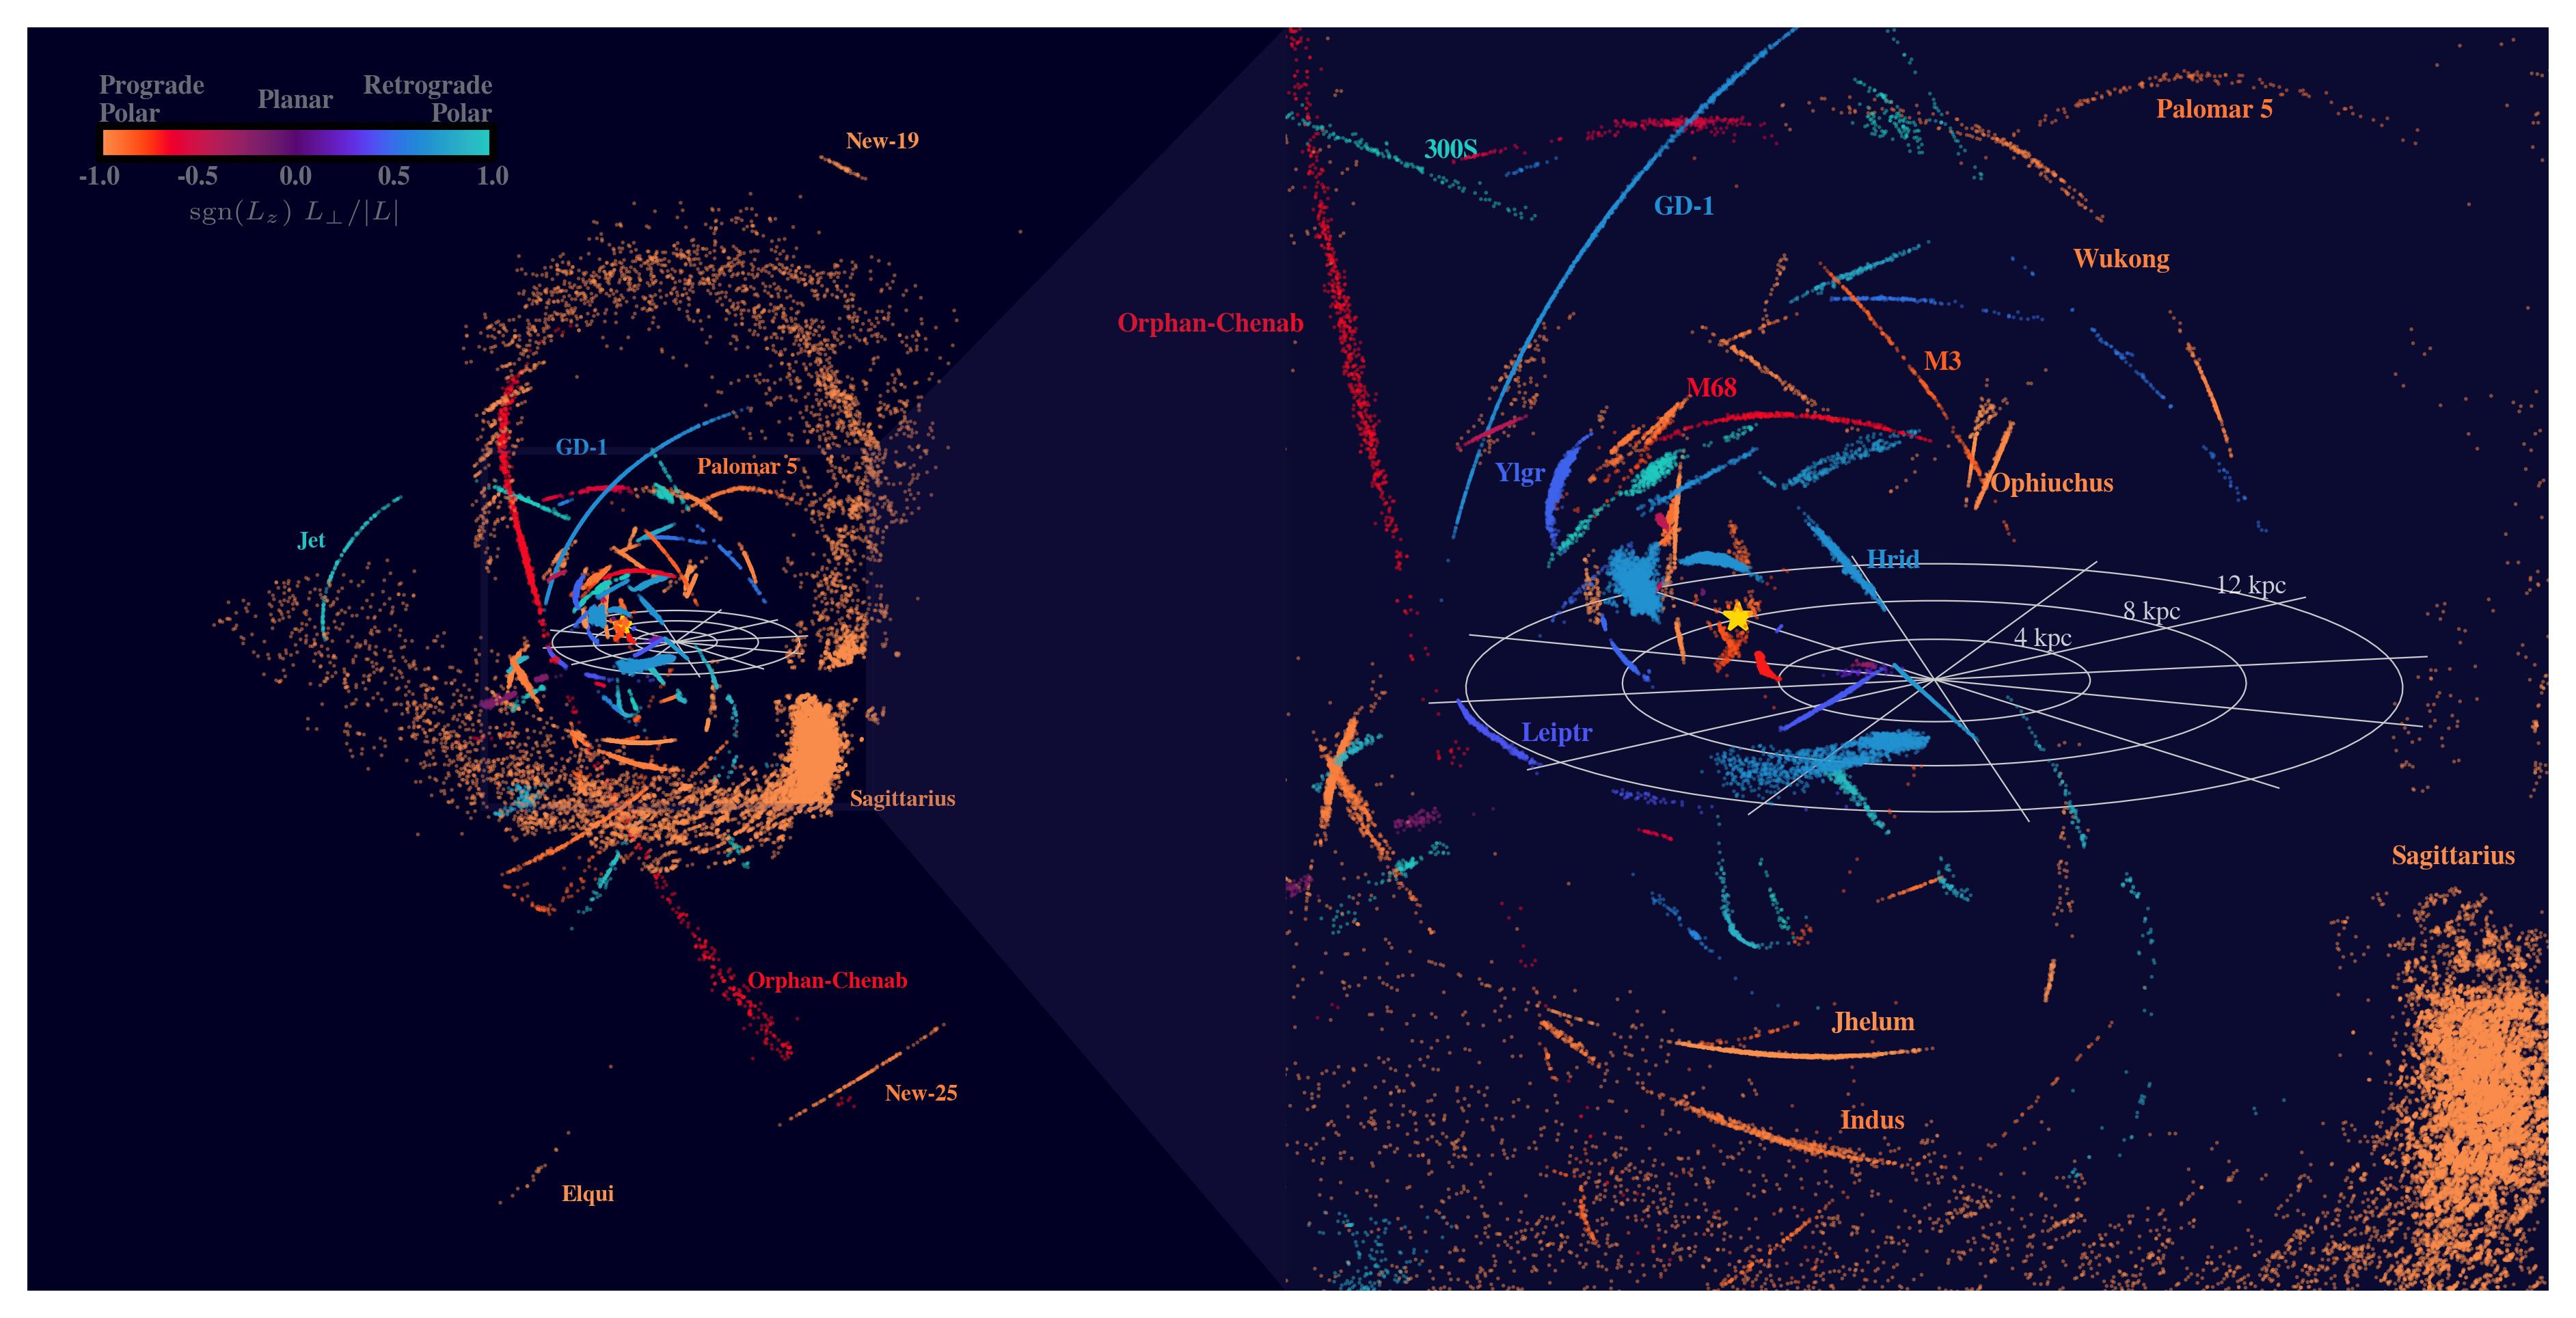

In [96]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121, projection='3d', facecolor='#010024')
# ax2 = fig.add_subplot(122, projection='3d', facecolor='#03002e')
bg_navy = '#0b0a31'
# bg_navy = '#83a9ce'
ax2 = fig.add_subplot(122, projection='3d', facecolor=bg_navy)

elev, azim, roll = 15, 175, 0
elev, azim, roll = 15, 320, 0
ax1.view_init(elev, azim, roll)

# elev, azim, roll = 15, 175, 0
ax2.view_init(elev, azim, roll)

radii = np.array([4,8,12])
theta = np.linspace(0,2*np.pi,100)

phi = np.arange(0,360,30)*u.deg
rlims = np.linspace(0,13,2)

teal = '#027b7c'
teal = '#59ff22'
teal = '#90ff6b'
teal = '0.8'
lw_grid = 0.4
sizes = [5,8]

for e, ax in enumerate([ax1,ax2]):
    plt.sca(ax)
    plt.axis('off')
    
    ############
    # plot disk 
    # circular
    for r in radii:
        x = r * np.cos(theta)
        y = r * np.sin(theta)
        z = theta * 0

        plt.plot(x, y, z, '-', color=teal, lw=lw_grid)

    # radial
    for p in phi:
        x = rlims * np.cos(p)
        y = rlims * np.sin(p)
        z = rlims * 0

        plt.plot(x, y, z, '-', color=teal, lw=lw_grid)

    # the Sun
    plt.plot(-8.1,0,0.02, '*', color='gold', ms=sizes[e])
        
    ###############
    # plot streams
    
#     ax.scatter(tall['X'], tall['Y'], tall['Z'], c='w', ec='none', s=1)

    for name in published[:]:
        ind = tall['name']==name
        if name=='Sagittarius':
            ind[::2] = False
        im = ax.scatter(tall['X'][ind], tall['Y'][ind], tall['Z'][ind], c=flperp[ind], cmap=cmr.guppy,
                  vmin=-1, vmax=1, ec='none', s=1, alpha=0.5)

plt.rcParams['font.weight'] = 'normal'

# # the Sun
# plt.gca().text(-8.3, 0, 0.6, 'Sun', ha='center', color='gold', fontsize='x-small')

# radii
dr = 0.9
ap = 1.03
for i in range(3):
    ax2.text((radii[i]+dr)*np.cos(ap*phi[3]), (radii[i]+dr)*np.sin(ap*phi[3]), 0, '{:.0f} kpc'.format(radii[i]),
             fontsize=7, color='w', alpha=0.8, ha='right')

plt.rcParams['font.weight'] = 'bold'

#############
# axes setup
ax2.set_xlim(-10,10)
ax2.set_ylim(-10,10)
ax2.set_zlim(-4,6)
ax2.set_aspect('equal', adjustable='datalim')

ax1.set_xlim(-35,35)
ax1.set_ylim(-35,35)
# ax1.set_ylim(-2,18)
ax1.set_zlim(-35,35)
ax1.set_aspect('equal')

wspace = -0.02
plt.subplots_adjust(wspace=wspace, hspace=0)


#####################
# Zoomed in rectangle

# Function to transform 3D points to 2D display coordinates
def transform_to_2d(ax, point_3d):
    point_3d_h = np.append(point_3d, 1)
    proj_matrix = ax.get_proj()
    point_2d_h = proj_matrix @ point_3d_h
    point_2d = point_2d_h[:2] / point_2d_h[3]
    display_point = ax.transData.transform(point_2d)
    return display_point

# Get the actual data limits displayed in the zoomed-in axes
data_lim = ax2.dataLim
zlim = np.array(ax2.get_zlim())
zlim_scale = zlim * (data_lim.x1-data_lim.x0)/(zlim[1]-zlim[0])

# Get the corners of the actual data limits
corners = np.array([
    [data_lim.xmin, data_lim.ymin, zlim_scale[0]],
    [data_lim.xmin, data_lim.ymin, zlim_scale[1]],
    [data_lim.xmin, data_lim.ymax, zlim_scale[0]],
    [data_lim.xmin, data_lim.ymax, zlim_scale[1]],
    [data_lim.xmax, data_lim.ymin, zlim_scale[0]],
    [data_lim.xmax, data_lim.ymin, zlim_scale[1]],
    [data_lim.xmax, data_lim.ymax, zlim_scale[0]],
    [data_lim.xmax, data_lim.ymax, zlim_scale[1]]
])

# Transform the corners to 2D display coordinates in the zoomed-out axes
corners_2d = np.array([transform_to_2d(ax1, corner) for corner in corners])

# Find the bounding box in 2D coordinates
min_x, min_y = np.min(corners_2d, axis=0)
max_x, max_y = np.max(corners_2d, axis=0)

# Transform display coordinates to figure coordinates
def display_to_figure(display_point, fig):
    return fig.transFigure.inverted().transform(display_point)

# Get figure coordinates of the bounding box
bottom_left = display_to_figure([min_x, min_y], fig)
top_right = display_to_figure([max_x, max_y], fig)

# Draw a rectangle in figure coordinates
rect = mpl.patches.Rectangle(bottom_left, top_right[0] - bottom_left[0], top_right[1] - bottom_left[1],
                 linewidth=2, edgecolor='#434177', alpha=0.2, facecolor='none', transform=fig.transFigure, zorder=0)
fig.patches.append(rect)

# Draw a connecting trapeze in figure coordinates
bbox1_display = ax1.get_window_extent()
bbox1_fig = bbox1_display.transformed(fig.transFigure.inverted())

aw = 0.23
dw = 1e-3
poly_vertices = np.array([[top_right[0]+dw, top_right[1]+dw], 
                          [bbox1_fig.x1+aw*wspace, bbox1_fig.y1], 
                          [bbox1_fig.x1+aw*wspace, bbox1_fig.y0], 
                          [top_right[0]+dw, bottom_left[1]-dw]])
polygon = mpl.patches.Polygon(poly_vertices,
                 linewidth=0, edgecolor='#434177', alpha=0.2, facecolor='#434177', transform=fig.transFigure, zorder=0)
fig.patches.append(polygon)


########
# Legend
tcolor = '#999999'
tcolor2 = '#666666'
talpha=0.7

x0 = 0.15
wx = 0.12
x1 = x0 + wx
ylegend = 0.86

# colorbar
dy_cbar = 0.06
cbar_pos = [x0, ylegend-dy_cbar, wx, 0.02]
cbar_ax = fig.add_axes(cbar_pos)

# dummy scalar mappable
norm = mpl.colors.Normalize(vmin=-1, vmax=1)
sm = mpl.cm.ScalarMappable(cmap=cmr.guppy, norm=norm)
sm.set_array([])

colorbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
colorbar.ax.tick_params(labelcolor=tcolor, labelsize=7, pad=2, size=0)
for label in colorbar.ax.get_xticklabels():
    label.set_alpha(talpha)

colorbar.set_label(r'sgn($L_z$) $L_\perp/|L|$', fontsize=7, color=tcolor, alpha=talpha, labelpad=2.5, usetex=True)

dy_legend = 0.025
fig.text(x0, ylegend - dy_legend,'Prograde\nPolar', color=tcolor, transform=fig.transFigure, alpha=talpha, 
         fontsize=7, ha='left', va='center')
fig.text(x0+0.5*wx, ylegend - dy_legend,'Planar', color=tcolor, transform=fig.transFigure, alpha=talpha, 
         fontsize=7, ha='center', va='center')
fig.text(x1, ylegend - dy_legend,'Retrograde\nPolar', color=tcolor, transform=fig.transFigure, alpha=talpha, 
         fontsize=7, ha='right', va='center')

#####################
# Outer stream labels
outer = {'Sagittarius':[20,5,-13],
        'Orphan-Chenab':[5,5,-35],
        'New-25':[22,8,-43],
        'Elqui':[-2,-13,-55],
        'Jet':[-25,-27,9],
        'New-19':[4,18,47],
        'GD-1':[-16,-2,16],
        'Palomar 5':[2,1,17]}

for stream in outer.keys():
    ind = tall['name']==stream
    scolor = icolor[ind][0]
    ax1.text(*outer[stream], stream, color=cmr.guppy(scolor), fontsize=6)

#####################
# Inner stream labels
inner = {'GD-1':[-9,-2,11],
        'Palomar 5':[5,3,15],
        'Wukong':[3,2,11],
        'Jhelum':[-3,-1,-10],
        'Indus':[1,-4,-11],
        'Orphan-Chenab':[-10,-18,10],
        '300S':[-15,-5,12],
        'Sagittarius':[17,0,-1],
        'Leiptr':[-5,-9.5,-1],
        'M68':[-9,-1,6],
        'Hrid':[-7,3.5,1],
        'Ylgr':[-8,-8,5],
        'M3':[-4,3,7],
        'Ophiuchus':[1,1,5]}

for stream in inner.keys():
    ind = tall['name']==stream
    print(stream, np.median(tall['X'][ind]), np.median(tall['Y'][ind]), np.median(tall['Z'][ind]))
    scolor = icolor[ind][0]
    ax2.text(*inner[stream], stream, color=cmr.guppy(scolor), fontsize=7)

plt.rcParams['font.weight'] = 'normal'
plt.savefig('../tex/figures/fos_3d.pdf', bbox_inches='tight', pad_inches=0)

### Annotated

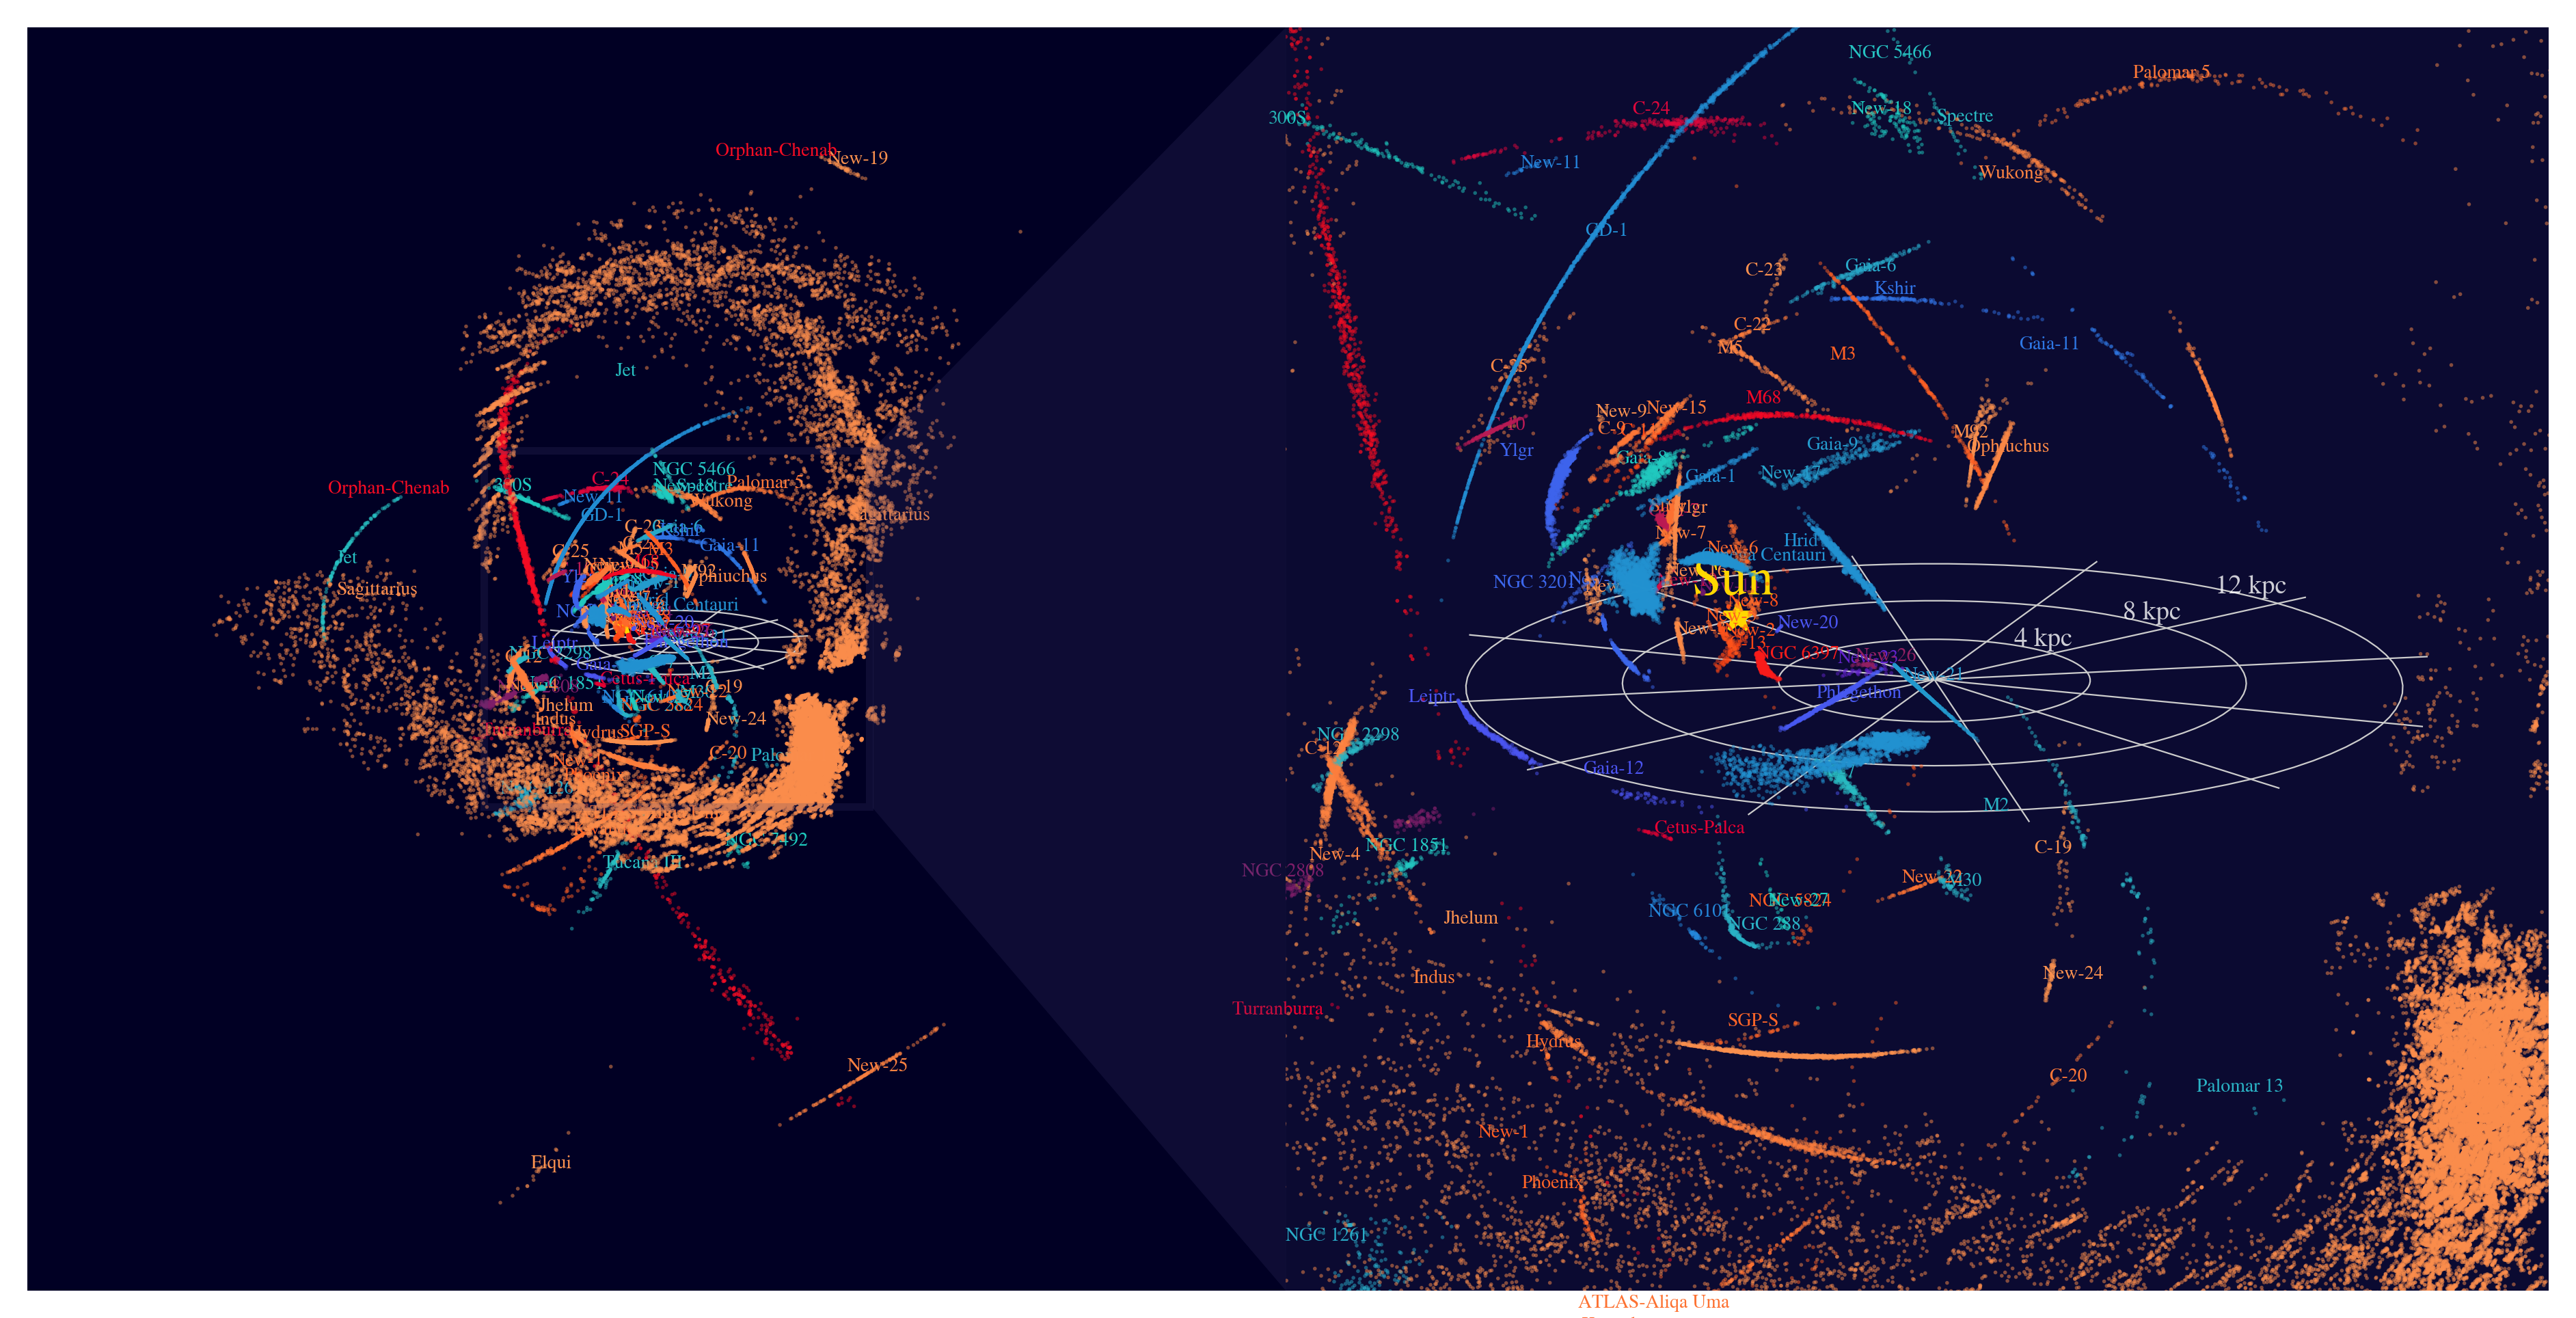

In [58]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121, projection='3d', facecolor='#010024')
# ax2 = fig.add_subplot(122, projection='3d', facecolor='#03002e')
bg_navy = '#0b0a31'
# bg_navy = '#83a9ce'
ax2 = fig.add_subplot(122, projection='3d', facecolor=bg_navy)

elev, azim, roll = 15, 175, 0
elev, azim, roll = 15, 320, 0
ax1.view_init(elev, azim, roll)

# elev, azim, roll = 15, 175, 0
ax2.view_init(elev, azim, roll)

radii = np.array([4,8,12])
theta = np.linspace(0,2*np.pi,100)

phi = np.arange(0,360,30)*u.deg
rlims = np.linspace(0,13,2)

teal = '#027b7c'
teal = '#59ff22'
teal = '#90ff6b'
teal = '0.8'
lw_grid = 0.4
sizes = [5,8]

for e, ax in enumerate([ax1, ax2]):
    plt.sca(ax)
    plt.axis('off')
    
    ############
    # plot disk 
    # circular
    for r in radii:
        x = r * np.cos(theta)
        y = r * np.sin(theta)
        z = theta * 0

        plt.plot(x, y, z, '-', color=teal, lw=lw_grid)

    # radial
    for p in phi:
        x = rlims * np.cos(p)
        y = rlims * np.sin(p)
        z = rlims * 0

        plt.plot(x, y, z, '-', color=teal, lw=lw_grid)

    # the Sun
    plt.plot(-8.1,0,0.02, '*', color='gold', ms=sizes[e])
        
    ###############
    # plot streams
    
#     ax.scatter(tall['X'], tall['Y'], tall['Z'], c='w', ec='none', s=1)

    for stream in published[:]:
        ind = tall['name']==stream
        im = ax.scatter(tall['X'][ind], tall['Y'][ind], tall['Z'][ind], c=flperp[ind], cmap=cmr.guppy,
                  vmin=-1, vmax=1, ec='none', s=1, alpha=0.5)
        
#         if e==0:
        plt.gca().text(np.min(tall['X'][ind]), np.median(tall['Y'][ind]), np.median(tall['Z'][ind]),
                      stream, color=cmr.guppy((flperp[ind][0]+1)*0.5), fontsize=5)

plt.rcParams['font.weight'] = 'normal'

# the Sun
plt.gca().text(-8.3, 0, 0.6, 'Sun', ha='center', color='gold', fontsize='x-small')

# radii
dr = 0.9
ap = 1.03
for i in range(3):
    ax2.text((radii[i]+dr)*np.cos(ap*phi[3]), (radii[i]+dr)*np.sin(ap*phi[3]), 0, '{:.0f} kpc'.format(radii[i]),
             fontsize=7, color='w', alpha=0.8, ha='right')

plt.rcParams['font.weight'] = 'bold'

#############
# axes setup
ax2.set_xlim(-10,10)
ax2.set_ylim(-10,10)
ax2.set_zlim(-4,6)
ax2.set_aspect('equal', adjustable='datalim')

ax1.set_xlim(-35,35)
ax1.set_ylim(-35,35)
# ax1.set_ylim(-2,18)
ax1.set_zlim(-35,35)
ax1.set_aspect('equal')

wspace = -0.02
plt.subplots_adjust(wspace=wspace, hspace=0)


#####################
# Zoomed in rectangle

# Function to transform 3D points to 2D display coordinates
def transform_to_2d(ax, point_3d):
    point_3d_h = np.append(point_3d, 1)
    proj_matrix = ax.get_proj()
    point_2d_h = proj_matrix @ point_3d_h
    point_2d = point_2d_h[:2] / point_2d_h[3]
    display_point = ax.transData.transform(point_2d)
    return display_point

# Get the actual data limits displayed in the zoomed-in axes
data_lim = ax2.dataLim
zlim = np.array(ax2.get_zlim())
zlim_scale = zlim * (data_lim.x1-data_lim.x0)/(zlim[1]-zlim[0])

# Get the corners of the actual data limits
corners = np.array([
    [data_lim.xmin, data_lim.ymin, zlim_scale[0]],
    [data_lim.xmin, data_lim.ymin, zlim_scale[1]],
    [data_lim.xmin, data_lim.ymax, zlim_scale[0]],
    [data_lim.xmin, data_lim.ymax, zlim_scale[1]],
    [data_lim.xmax, data_lim.ymin, zlim_scale[0]],
    [data_lim.xmax, data_lim.ymin, zlim_scale[1]],
    [data_lim.xmax, data_lim.ymax, zlim_scale[0]],
    [data_lim.xmax, data_lim.ymax, zlim_scale[1]]
])

# Transform the corners to 2D display coordinates in the zoomed-out axes
corners_2d = np.array([transform_to_2d(ax1, corner) for corner in corners])

# Find the bounding box in 2D coordinates
min_x, min_y = np.min(corners_2d, axis=0)
max_x, max_y = np.max(corners_2d, axis=0)

# Transform display coordinates to figure coordinates
def display_to_figure(display_point, fig):
    return fig.transFigure.inverted().transform(display_point)

# Get figure coordinates of the bounding box
bottom_left = display_to_figure([min_x, min_y], fig)
top_right = display_to_figure([max_x, max_y], fig)

# Draw a rectangle in figure coordinates
rect = mpl.patches.Rectangle(bottom_left, top_right[0] - bottom_left[0], top_right[1] - bottom_left[1],
                 linewidth=2, edgecolor='#434177', alpha=0.2, facecolor='none', transform=fig.transFigure, zorder=0)
fig.patches.append(rect)

# Draw a connecting trapeze in figure coordinates
bbox1_display = ax1.get_window_extent()
bbox1_fig = bbox1_display.transformed(fig.transFigure.inverted())

aw = 0.23
dw = 1e-3
poly_vertices = np.array([[top_right[0]+dw, top_right[1]+dw], 
                          [bbox1_fig.x1+aw*wspace, bbox1_fig.y1], 
                          [bbox1_fig.x1+aw*wspace, bbox1_fig.y0], 
                          [top_right[0]+dw, bottom_left[1]-dw]])
polygon = mpl.patches.Polygon(poly_vertices,
                 linewidth=0, edgecolor='#434177', alpha=0.2, facecolor='#434177', transform=fig.transFigure, zorder=0)
fig.patches.append(polygon)

plt.rcParams['font.weight'] = 'normal'

# plt.savefig('../tex/figures/fos_3d.pdf', bbox_inches='tight', pad_inches=0)